<a href="https://colab.research.google.com/github/PenLoo98/Python-Practice/blob/main/2022_10_4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

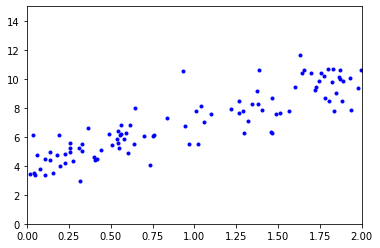

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가합니다. 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
theta_best

array([[4.03485726],
       [3.0563115 ]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.predict([[0], [2]])

array([[ 3.90506628],
       [10.16689491]])

In [ ]:
# 배치 경사 하강법 알고리즘 구현

eta = 0.1 # 학습률 
n_iterations = 1000 
m = 100
theta = np.random.randn(2, 1) # 무작위 초기화
for _ in range(n_iterations):
  gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
theta

array([[6.61731407],
       [0.29222933]])

In [ ]:
from random import random
n_epochs = 50
t0,t1=5,50 # 학습 스케줄 하이퍼파리미터 
def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2, 1) # 무작위 초기화
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
theta

array([[6.67613797],
       [0.42770154]])

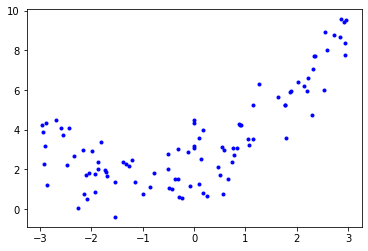

In [ ]:
# 다항회귀 실습

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,'b.')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# 확장된 훈련 데이터에 Linear Regression 적용
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8750243]), array([[1.0109337, 0.5472128]]))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves( model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validate set")
  plt.show()